<a href="https://colab.research.google.com/github/Gautam-Rajeev/statistical_rethinking/blob/main/causal_book/Causality_chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

. For example, in the hotel industry, prices are low outside the tourist season, and prices are high when demand is highest and hotels are full. Given that data, a naive prediction might suggest that increasing the price would lead to more rooms sold.”

ML is notoriously bad at this inverse causality type of problem. They require us to answer “what if” questions, which economists call counterfactuals. What would happen if I used another price instead of this price I’m currently asking for my merchandise?

In [7]:
import pandas as pd
import numpy as np
from scipy.special import expit

## expit(x) = 1/(1+exp(-x)). -- sigmoid function that connverts anything to probability vaue between 0 and 1
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round()

## bimonial function, p is expit(normalized vaulue of tuition ), so higher t means higher p, so higher chance of 1

tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)

## mean for scores: score is made such that having a tablet reduces score by 50 but score is 0.7 * tuition, sd : 300
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
##normlaise to 1000
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

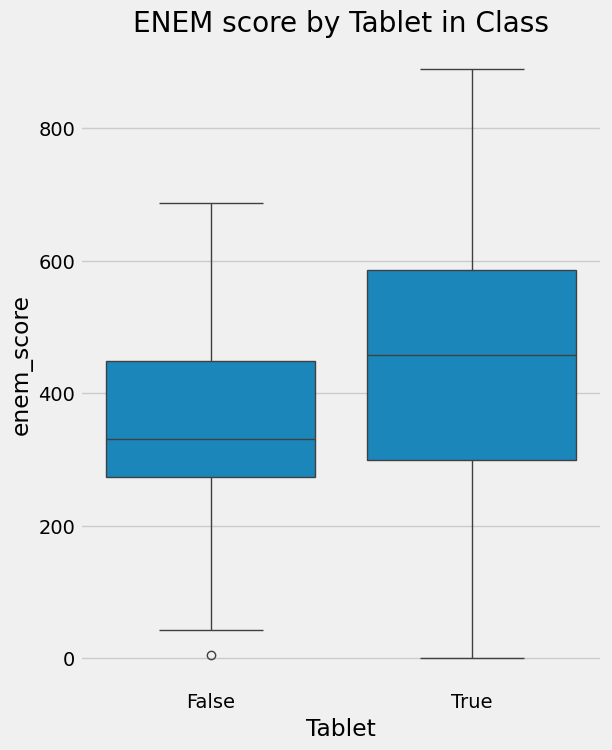

In [8]:
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

Let's call $T_i$ the treatment intake for unit i.

$
T_i=\begin{cases}
1 \ \text{if unit i received the treatment}\\
0 \ \text{otherwise}\\
\end{cases}
$

we will talk a lot in term of potential outcomes. They are potential because they didn’t actually happen. Instead they denote what would have happened in the case some treatment was taken. We sometimes call the potential outcome that happened, factual, and the one that didn’t happen, counterfactual.

$Y_{0i}$ is the potential outcome for unit i without the treatment.

$Y_{1i}$ is the potential outcome for **the same** unit i with the treatment.

Sometimes you might see potential outcomes represented as functions $Y_i(t)$, so beware. $Y_{0i}$ could be $Y_i(0)$ and $Y_{1i}$ could be $Y_i(1)$. Here, we will use the subscript notation most of the time.

 is the academic performance for student i if he or she is in a classroom with tablets. Whether this is or not the case, it doesn’t matter for
. It is the same regardless. If student i gets the tablet, we can observe
. If not, we can observe
. Notice how in this last case,
 is still defined, we just can’t see it. In this case, it is a counterfactual potential outcome.


With potential outcomes, we can define the individual treatment effect:

 $Y_{1i} - Y_{0i}$

**average treatment effect**, which is defined as follows.

$ATE = E[Y_1 - Y_0]$

where, `E[...]` is the expected value. Another easier quantity to estimate is the **average treatment effect on the treated**:

In [9]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    Y0=[500,600,800,700],
    Y1=[450,600,600,750],
    T= [0,0,1,1],
    Y= [500,600,600,750],
    TE=[-50,0,-200,50],
))

,i,Y0,Y1,T,Y,TE
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50


Causality is being able to do average of TE where T = 1 or just average of TE
in real life, one can only do average of Y1|t==1 - averge of Y0|t==0, which gives a very different answer from mean of TE


$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

The bias is given by how the treated and control group differ before the treatment, in case neither of them has received the treatment.

As we can see, the association is equal to the treatment effect on the treated plus a bias term